In [3]:
import csv
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import datetime as dt
from datetime import datetime

import calendar

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image 
import PIL 

In [2]:
data = pd.read_csv('Part1_Crime_data.csv')
data

,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape
0,1.434897e+06,589600.863257,1,2021/11/20 18:57:36+00,1A,0 S CONKLING ST,HOMICIDE,Outside,FIREARM,214,SOUTHEAST,BREWERS HILL,39.2848,-76.5670,"(39.2848,-76.567)",STREET,NaN,1,NaN
1,1.435403e+06,590331.741005,2,2021/11/20 11:30:00+00,3N,3800 EASTERN AVE,ROBBERY - STREET,NaN,OTHER,225,SOUTHEAST,HIGHLANDTOWN,39.2868,-76.5652,"(39.2868,-76.5652)",NaN,NaN,1,NaN
2,1.435291e+06,619725.449338,3,2021/11/20 10:00:00+00,4E,2400 E NORTHERN PKWY,COMMON ASSAULT,NaN,NaN,423,NORTHEAST,HAMILTON HILLS,39.3675,-76.5651,"(39.3675,-76.5651)",NaN,NaN,1,NaN
3,1.421978e+06,599122.239793,4,2021/11/20 08:00:00+00,4E,200 E NORTH AVE,COMMON ASSAULT,Outside,NaN,311,EASTERN,GREENMOUNT WEST,39.3111,-76.6125,"(39.3111,-76.6125)",OTHER/RESIDENTIAL,NaN,1,NaN
4,1.415582e+06,606453.510300,5,2021/11/20 09:06:00+00,4E,3600 FALLS RD,COMMON ASSAULT,NaN,NaN,531,NORTHERN,HAMPDEN,39.3313,-76.6350,"(39.3313,-76.635)",NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263847,1.417760e+06,585627.951537,263848,2016/01/01 01:00:00+00,6J,1500 RUSSELL ST,LARCENY,NaN,NaN,SD5,SOUTHERN,CARROLL - CAMDEN INDUSTRIAL AREA,39.2741,-76.6276,"(39.2741,-76.6276)",NaN,NaN,1,NaN
263848,1.421730e+06,597336.426222,263849,2016/01/01 00:00:00+00,4E,1500 N CALVERT ST,COMMON ASSAULT,NaN,NaN,134,CENTRAL,GREENMOUNT WEST,39.3062,-76.6134,"(39.3062,-76.6134)",NaN,NaN,1,NaN
263849,1.421271e+06,598937.130994,263850,2016/01/01 14:23:00+00,3AO,1800 SAINT PAUL ST,ROBBERY - STREET,I,OTHER,134,CENTRAL,CHARLES NORTH,39.3106,-76.6150,"(39.3106,-76.615)",ROW/TOWNHOUSE-OCC,NaN,1,NaN
263850,1.410679e+06,594013.858703,263851,2016/01/01 16:10:00+00,4A,800 SPEDDEN ST,AGG. ASSAULT,O,FIREARM,722,WESTERN,MIDTOWN-EDMONDSON,39.2972,-76.6525,"(39.2972,-76.6525)",STREET,NaN,1,NaN


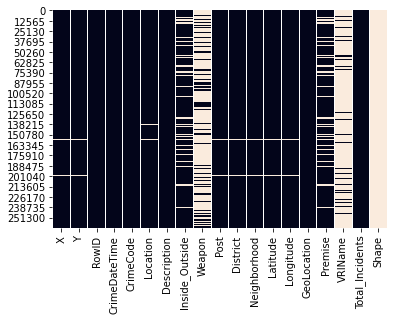

In [7]:
sns.heatmap(data.isnull(), cbar=False)
plt.savefig('before.jpg', dpi=400)

In [8]:
data = data.drop(['VRIName','Shape','X','Y','Weapon'], axis=1)

In [9]:
data['crime_date'] = pd.to_datetime(data['CrimeDateTime']).dt.date
data['crime_time'] = pd.to_datetime(data['CrimeDateTime']).dt.time

data['crime_date'] = pd.to_datetime(data['crime_date'], format='%Y-%m-%d')

data = data.drop(['CrimeDateTime'],axis=1)

In [10]:
data = data.dropna()
data = data.reset_index()
data = data.drop(['index'],axis=1)

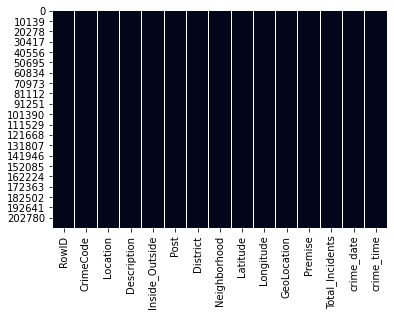

In [11]:
after = sns.heatmap(data.isnull(), cbar=False)
plt.savefig('after.jpg', dpi=400)

In [15]:
for i in range(len(data['Inside_Outside'])):
    if data.iloc[i,4] == 'O':
        data.iloc[i,4] = 'Outside'
    elif data.iloc[i,4] == 'I':
        data.iloc[i,4] = 'Inside'

In [16]:
data.dtypes

RowID                       int64
CrimeCode                  object
Location                   object
Description                object
Inside_Outside             object
Post                       object
District                   object
Neighborhood               object
Latitude                  float64
Longitude                 float64
GeoLocation                object
Premise                    object
Total_Incidents             int64
crime_date         datetime64[ns]
crime_time                 object
dtype: object

In [17]:
data.to_csv('crimedata.csv')

In [18]:
data.isna().sum()

RowID              0
CrimeCode          0
Location           0
Description        0
Inside_Outside     0
Post               0
District           0
Neighborhood       0
Latitude           0
Longitude          0
GeoLocation        0
Premise            0
Total_Incidents    0
crime_date         0
crime_time         0
dtype: int64

In [19]:
data['day'] = data['crime_date'].dt.day_name()

In [20]:
data

,RowID,CrimeCode,Location,Description,Inside_Outside,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,Total_Incidents,crime_date,crime_time,day
0,1,1A,0 S CONKLING ST,HOMICIDE,Outside,214,SOUTHEAST,BREWERS HILL,39.2848,-76.5670,"(39.2848,-76.567)",STREET,1,2021-11-20,18:57:36,Saturday
1,4,4E,200 E NORTH AVE,COMMON ASSAULT,Outside,311,EASTERN,GREENMOUNT WEST,39.3111,-76.6125,"(39.3111,-76.6125)",OTHER/RESIDENTIAL,1,2021-11-20,08:00:00,Saturday
2,11,7A,3800 BROOKLYN AVE,AUTO THEFT,Inside,913,SOUTHERN,BROOKLYN,39.2337,-76.6014,"(39.2337,-76.6014)",STREET,1,2021-11-20,07:56:00,Saturday
3,12,7A,4800 ABERDEEN AVE,AUTO THEFT,Inside,443,NORTHEAST,FRANKFORD,39.3197,-76.5507,"(39.3197,-76.5507)",STREET,1,2021-11-20,02:00:00,Saturday
4,26,4D,2800 EDGECOMBE CIR N,AGG. ASSAULT,Outside,532,NORTHERN,PARKLANE,39.3433,-76.6633,"(39.3433,-76.6633)",OTHER/RESIDENTIAL,1,2021-11-20,01:57:00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212905,263846,6J,1600 THAMES ST,LARCENY,Outside,213,SOUTHEAST,FELLS POINT,39.2810,-76.5950,"(39.281,-76.595)",STREET,1,2016-01-01,01:30:00,Friday
212906,263847,7A,1900 N PULASKI ST,AUTO THEFT,Outside,731,WESTERN,MONDAWMIN,39.3098,-76.6514,"(39.3098,-76.6514)",STREET,1,2016-01-01,01:55:00,Friday
212907,263850,3AO,1800 SAINT PAUL ST,ROBBERY - STREET,Inside,134,CENTRAL,CHARLES NORTH,39.3106,-76.6150,"(39.3106,-76.615)",ROW/TOWNHOUSE-OCC,1,2016-01-01,14:23:00,Friday
212908,263851,4A,800 SPEDDEN ST,AGG. ASSAULT,Outside,722,WESTERN,MIDTOWN-EDMONDSON,39.2972,-76.6525,"(39.2972,-76.6525)",STREET,1,2016-01-01,16:10:00,Friday


In [21]:
date_time = data[['RowID','crime_date','crime_time','day']]
date_time.to_csv('date_time.csv')

In [22]:
crime_codes = pd.read_csv('CRIME_CODES.csv')

In [23]:
crime_location = data[['RowID','Location','Inside_Outside','Post','District','Neighborhood','Latitude','Longitude','GeoLocation','Premise']]

In [24]:
crime_location.to_csv('crime_location.csv')

In [25]:
crime = data[['RowID','CrimeCode','Description','Total_Incidents']]

In [26]:
crime.to_csv('crime.csv')

In [12]:
data.head()

,RowID,CrimeCode,Location,Description,Inside_Outside,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,Total_Incidents,crime_date,crime_time
0,1,1A,0 S CONKLING ST,HOMICIDE,Outside,214,SOUTHEAST,BREWERS HILL,39.2848,-76.5670,"(39.2848,-76.567)",STREET,1,2021-11-20,18:57:36
1,4,4E,200 E NORTH AVE,COMMON ASSAULT,Outside,311,EASTERN,GREENMOUNT WEST,39.3111,-76.6125,"(39.3111,-76.6125)",OTHER/RESIDENTIAL,1,2021-11-20,08:00:00
2,11,7A,3800 BROOKLYN AVE,AUTO THEFT,Inside,913,SOUTHERN,BROOKLYN,39.2337,-76.6014,"(39.2337,-76.6014)",STREET,1,2021-11-20,07:56:00
3,12,7A,4800 ABERDEEN AVE,AUTO THEFT,Inside,443,NORTHEAST,FRANKFORD,39.3197,-76.5507,"(39.3197,-76.5507)",STREET,1,2021-11-20,02:00:00
4,26,4D,2800 EDGECOMBE CIR N,AGG. ASSAULT,Outside,532,NORTHERN,PARKLANE,39.3433,-76.6633,"(39.3433,-76.6633)",OTHER/RESIDENTIAL,1,2021-11-20,01:57:00


,RowID,CrimeCode,Location,Description,Inside_Outside,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,Total_Incidents,crime_date,crime_time,day
0,1,1A,0 S CONKLING ST,HOMICIDE,Outside,214,SOUTHEAST,BREWERS HILL,39.2848,-76.5670,"(39.2848,-76.567)",STREET,1,2021-11-20,18:57:36,Saturday
1,4,4E,200 E NORTH AVE,COMMON ASSAULT,Outside,311,EASTERN,GREENMOUNT WEST,39.3111,-76.6125,"(39.3111,-76.6125)",OTHER/RESIDENTIAL,1,2021-11-20,08:00:00,Saturday
2,11,7A,3800 BROOKLYN AVE,AUTO THEFT,Inside,913,SOUTHERN,BROOKLYN,39.2337,-76.6014,"(39.2337,-76.6014)",STREET,1,2021-11-20,07:56:00,Saturday
3,12,7A,4800 ABERDEEN AVE,AUTO THEFT,Inside,443,NORTHEAST,FRANKFORD,39.3197,-76.5507,"(39.3197,-76.5507)",STREET,1,2021-11-20,02:00:00,Saturday
4,26,4D,2800 EDGECOMBE CIR N,AGG. ASSAULT,Outside,532,NORTHERN,PARKLANE,39.3433,-76.6633,"(39.3433,-76.6633)",OTHER/RESIDENTIAL,1,2021-11-20,01:57:00,Saturday
